# Math 189 - Final Project Group 08

# Research Question

# Data

## Source of Data

## Data Description

# Exploratory Data Analysis (EDA)

In [2]:
import pandas as pd 


In [3]:
df = pd.read_csv('Rodent_Inspection.csv')
df

,INSPECTION_TYPE,JOB_TICKET_OR_WORK_ORDER_ID,JOB_ID,JOB_PROGRESS,BBL,BORO_CODE,BLOCK,LOT,HOUSE_NUMBER,STREET_NAME,...,BOROUGH,INSPECTION_DATE,RESULT,APPROVED_DATE,LOCATION,COMMUNITY BOARD,COUNCIL DISTRICT,CENSUS TRACT,BIN,NTA
0,Compliance,13691571,PC8117359,2,NaN,2,2359,1,WESTCHESTER,AVENUE,...,Bronx,08/01/2023 11:00:56 AM,Failed for Other R,08/02/2023 02:36:58 PM,NaN,NaN,NaN,NaN,NaN,NaN
1,Initial,13232515,PC7705967,1,NaN,1,377,14,EAST,8 STREET,...,Manhattan,05/21/2021 12:35:00 PM,Passed,05/24/2021 08:44:34 AM,NaN,NaN,NaN,NaN,NaN,NaN
2,Initial,13167121,PC7615816,1,NaN,3,1609,36,LAFAYETTE,AVENUE,...,Brooklyn,07/13/2020 10:40:00 AM,Passed,07/14/2020 11:42:07 AM,NaN,NaN,NaN,NaN,NaN,NaN
3,Initial,11976589,PC6233153,1,NaN,1,247,2,NaN,CHERRY STREET,...,Manhattan,04/01/2014 10:56:18 AM,Passed,04/02/2014 10:30:18 AM,"(40.7104723934184, -73.9887199360033)",NaN,NaN,NaN,NaN,NaN
4,Initial,13425393,PC7892099,1,NaN,2,2539,180,MAJ,WM DEEGAN BLVD,...,Bronx,07/07/2022 03:34:00 PM,Passed,07/11/2022 07:59:51 AM,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2495632,Initial,11508904,PC6551693,1,NaN,2,4018,46,000,ADAMS STREET,...,Bronx,10/25/2010 10:10:38 AM,Failed for Other R,10/26/2010 08:57:56 AM,"(0.0, 0.0)",NaN,NaN,NaN,NaN,NaN
2495633,Compliance,12793636,PC7523895,2,NaN,5,7923,7,00,HYLAN BOULEVARD,...,Staten Island,08/15/2011 04:05:36 PM,Passed,08/17/2011 10:58:54 AM,"(0.0, 0.0)",NaN,NaN,NaN,NaN,NaN
2495634,BAIT,2429201,PC7477822,5,NaN,5,3708,43,000,DONGAN HILLS AVENUE,...,Staten Island,10/31/2011 11:50:01 AM,Bait applied,11/17/2011 04:28:06 PM,"(0.0, 0.0)",NaN,NaN,NaN,NaN,NaN
2495635,Initial,13559832,PC8011485,1,NaN,2,4260,30,NEILL,AVENUE,...,Bronx,01/13/2023 12:36:48 PM,Passed,01/20/2023 09:23:07 AM,NaN,NaN,NaN,NaN,NaN,NaN


Let's start off by plotting a visual map of the rat sightings given their location. For simplicity, let's assume the data is MCAR. This is unlikely to be the real case, but there isn't much imputation we could do with latitude and longtitude. 

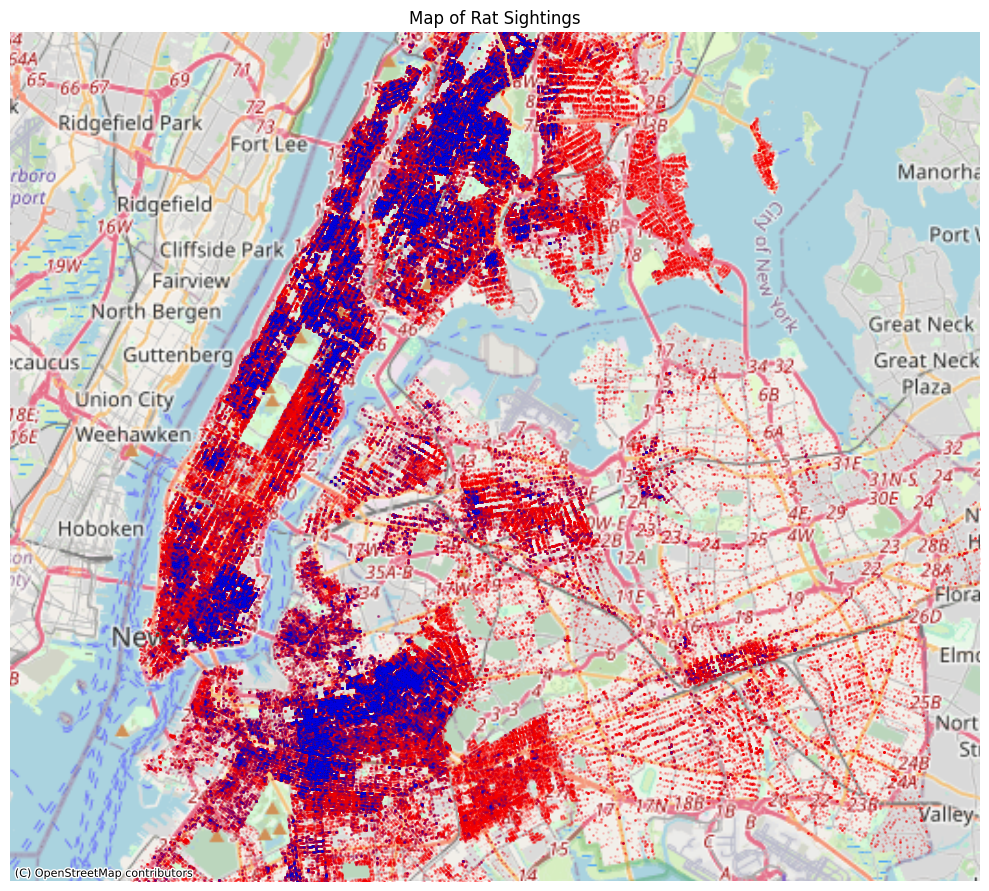

In [59]:
import geopandas as gpd
from shapely.geometry import Point
import matplotlib.pyplot as plt
import contextily as ctx

geo_df = df[['LATITUDE', 'LONGITUDE']].dropna()
geo_df = geo_df[(geo_df['LATITUDE'] != 0) & (geo_df['LONGITUDE'] != 0)]

geo_df_2 = df[df['RESULT'] == 'Rat Activity']
geo_df_2 = geo_df_2[['LATITUDE', 'LONGITUDE']].dropna()
geo_df_2 = geo_df_2[(geo_df_2['LATITUDE'] != 0) & (geo_df_2['LONGITUDE'] != 0)]


gdf = gpd.GeoDataFrame(geo_df, geometry=gpd.points_from_xy(geo_df['LONGITUDE'], geo_df['LATITUDE']))
gdf_rat_activity = gpd.GeoDataFrame(geo_df_2, geometry=gpd.points_from_xy(geo_df_2['LONGITUDE'], geo_df_2['LATITUDE']))

gdf.crs = "EPSG:4326"
gdf_rat_activity.crs = "EPSG:4326"
gdf_activity_web_mercator = gdf_rat_activity.to_crs(epsg=3857)

gdf_web_mercator = gdf.to_crs(epsg=3857)

x_min, x_max, y_min, y_max = -8245000, -8205000, 4960000, 4995000

fig, ax = plt.subplots(figsize=(10, 10), dpi=100)

ax.set_xlim(x_min, x_max)
ax.set_ylim(y_min, y_max)


gdf_web_mercator.plot(ax=ax, marker='o', color='red', markersize=1, alpha=0.06) 
gdf_activity_web_mercator.plot(ax=ax, marker='o', color='blue', markersize=1, alpha=0.03) 

ctx.add_basemap(ax, source=ctx.providers.OpenStreetMap.Mapnik)

ax.set_axis_off()
plt.title('Map of Rat Sightings')
plt.tight_layout()
plt.show()


The red represents rat inspections, and the blue represents where rat activity was found. From the eye test, it looks like West Bronx, Upper Brooklyn, and to a lesser extent, the lower East Side are particular rat hotspots. 

Next, let's clean up the dataframe and drop columns we aren't going to use

In [60]:
df['INSPECTION_DATE'] = pd.to_datetime(df['INSPECTION_DATE'])
df['YEAR'] = df['INSPECTION_DATE'].dt.year
df['MONTH'] = df['INSPECTION_DATE'].dt.month
df['DAY'] = df['INSPECTION_DATE'].dt.day
df


,INSPECTION_TYPE,JOB_TICKET_OR_WORK_ORDER_ID,JOB_ID,JOB_PROGRESS,BBL,BORO_CODE,BLOCK,LOT,HOUSE_NUMBER,STREET_NAME,...,APPROVED_DATE,LOCATION,COMMUNITY BOARD,COUNCIL DISTRICT,CENSUS TRACT,BIN,NTA,YEAR,MONTH,DAY
0,Compliance,13691571,PC8117359,2,NaN,2,2359,1,WESTCHESTER,AVENUE,...,08/02/2023 02:36:58 PM,NaN,NaN,NaN,NaN,NaN,NaN,2023.0,8.0,1.0
1,Initial,13232515,PC7705967,1,NaN,1,377,14,EAST,8 STREET,...,05/24/2021 08:44:34 AM,NaN,NaN,NaN,NaN,NaN,NaN,2021.0,5.0,21.0
2,Initial,13167121,PC7615816,1,NaN,3,1609,36,LAFAYETTE,AVENUE,...,07/14/2020 11:42:07 AM,NaN,NaN,NaN,NaN,NaN,NaN,2020.0,7.0,13.0
3,Initial,11976589,PC6233153,1,NaN,1,247,2,NaN,CHERRY STREET,...,04/02/2014 10:30:18 AM,"(40.7104723934184, -73.9887199360033)",NaN,NaN,NaN,NaN,NaN,2014.0,4.0,1.0
4,Initial,13425393,PC7892099,1,NaN,2,2539,180,MAJ,WM DEEGAN BLVD,...,07/11/2022 07:59:51 AM,NaN,NaN,NaN,NaN,NaN,NaN,2022.0,7.0,7.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2495632,Initial,11508904,PC6551693,1,NaN,2,4018,46,000,ADAMS STREET,...,10/26/2010 08:57:56 AM,"(0.0, 0.0)",NaN,NaN,NaN,NaN,NaN,2010.0,10.0,25.0
2495633,Compliance,12793636,PC7523895,2,NaN,5,7923,7,00,HYLAN BOULEVARD,...,08/17/2011 10:58:54 AM,"(0.0, 0.0)",NaN,NaN,NaN,NaN,NaN,2011.0,8.0,15.0
2495634,BAIT,2429201,PC7477822,5,NaN,5,3708,43,000,DONGAN HILLS AVENUE,...,11/17/2011 04:28:06 PM,"(0.0, 0.0)",NaN,NaN,NaN,NaN,NaN,2011.0,10.0,31.0
2495635,Initial,13559832,PC8011485,1,NaN,2,4260,30,NEILL,AVENUE,...,01/20/2023 09:23:07 AM,NaN,NaN,NaN,NaN,NaN,NaN,2023.0,1.0,13.0


# Past Research and Analysis regarding the Rats Dataset

#### What (if any) analyses have already been performed on this data (or another similar dataset)?  (need reference)

# Analysis 

# Interpretation of the results

# Conclusion and discussion for future work